# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

# Paso 1: Importar librerías 

In [95]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Paso 2: pedir permiso y descargar el HTML

In [96]:
url = "https://ycharts.com/companies/TSLA/revenues"

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}

response = requests.get(url, headers = headers)

if response.status_code ==200:
    contenido = response.content

else:
    print(f'status code distinto a 200: {response.status_code}') 

# Paso 3: Tranformar el HTML

In [97]:
soup = BeautifulSoup(contenido, 'html.parser')

# Las tablas tiene etiqueta table y clase table
tablas = soup.find_all('table', class_='table')
# La tabla de trimestrales tiene la clase col-6
trimestrales = soup.find_all('div', class_='col-6')
# La tabla de trimestrales esta dividida en 2 columnas
# tienen la siguiente estructura:
# <div class="row">
#     <div class="col-6">
#         <table class="table">
#             <thead>
#                 <tr>
#                     <th>Date</th>
#                     <th class="text-right">Value</th>
#                 </tr>
#             </thead>
#             <tbody>
                
#                     <tr>
#                         <td>June 30, 2024</td>
#                         <td class="text-right">
                            
#                                 25.50B
                            
#                         </td>
#                     </tr>

# Iterar sobre cada tabla encontrada
data = []
for tabla in trimestrales:
    # Iterar sobre cada fila de la tabla 
    for fila in tabla.find('tbody').find_all('tr'): # find('tbody') para evitar las cabeceras
        # Extraer la fecha y el valor
        date = fila.find('td').get_text().strip()
        value = fila.find('td', class_='text-right').get_text().strip()
        data.append((date, value))

df_trimestral = pd.DataFrame(data, columns=['Date', 'Revenue'])

# trimestrales = soup.find_all('div', class_='col-6')
# data = []
# for fila in trimestrales:
#      date = fila.find('td').get_text().strip()
#      value = fila.find('td', class_='text-right').get_text().replace('B', '')
#      data.append((date, value))
#      df_trimestral = pd.DataFrame(data, columns=['Date', 'Revenue'])

# tablas = soup.find_all('table', class_='table')


In [98]:
# Funcion para pasar todo a la misma unidad
def convertir_revenue(valor):
    if valor.endswith('B'):  # Si el valor termina en 'B'
        return float(valor[:-1]) * 1_000_000_000  # Multiplica por 1,000,000,000
    elif valor.endswith('M'):  # Si el valor termina en 'M'
        return float(valor[:-1]) * 1_000_000  # Multiplica por 1,000,000
    else:
        return float(valor)  # Si no tiene sufijo, asume que ya está en la unidad correcta


In [99]:
# Lo aplicamos
df_trimestral['Revenue'] = df_trimestral['Revenue'].apply(convertir_revenue)

In [100]:
# trimestrales
# date
# value
df_trimestral.head(54) # compruebo que solo me coje los datoa de la tabla de trimestrales

,Date,Revenue
0,"June 30, 2024",2.550000e+10
1,"March 31, 2024",2.130000e+10
2,"December 31, 2023",2.517000e+10
3,"September 30, 2023",2.335000e+10
4,"June 30, 2023",2.493000e+10
5,"March 31, 2023",2.333000e+10
6,"December 31, 2022",2.432000e+10
7,"September 30, 2022",2.145000e+10
8,"June 30, 2022",1.693000e+10
9,"March 31, 2022",1.876000e+10


In [101]:
# Voy a cambiar el formato de las fechas
# Convertir las fechas al formato datetime
df_trimestral['Date'] = pd.to_datetime(df_trimestral['Date'], format='%B %d, %Y')


In [102]:
# Cambio al formato dia/mes/año
df_trimestral['Date'] = df_trimestral['Date'].dt.strftime('%d/%m/%Y')

In [103]:
df_trimestral.head()

,Date,Revenue
0,30/06/2024,2.550000e+10
1,31/03/2024,2.130000e+10
2,31/12/2023,2.517000e+10
3,30/09/2023,2.335000e+10
4,30/06/2023,2.493000e+10


# Paso 4: Procesa el DataFrame
Todas las filas tienen información y los datos están puestos en el formato deseado (hecho en paso 3).

# Paso 5: Almacena los datos en sqlite

In [106]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [107]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

OperationalError: table revenue already exists

In [ ]:
trimestral_tuples = list(df_trimestral.to_records(index = False))
trimestral_tuples[:5]

[np.record(('30/06/2024', '25.50'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('31/03/2024', '21.30'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('31/12/2023', '25.17'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('30/09/2023', '23.35'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('30/06/2023', '24.93'), dtype=[('Date', 'O'), ('Revenue', 'O')])]

In [ ]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", trimestral_tuples)
connection.commit()

In [ ]:
# Check the data from the database
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('30/06/2024', '25.50')
('31/03/2024', '21.30')
('31/12/2023', '25.17')
('30/09/2023', '23.35')
('30/06/2023', '24.93')
('31/03/2023', '23.33')
('31/12/2022', '24.32')
('30/09/2022', '21.45')
('30/06/2022', '16.93')
('31/03/2022', '18.76')
('31/12/2021', '17.72')
('30/09/2021', '13.76')
('30/06/2021', '11.96')
('31/03/2021', '10.39')
('31/12/2020', '10.74')
('30/09/2020', '8.771')
('30/06/2020', '6.036')
('31/03/2020', '5.985')
('31/12/2019', '7.384')
('30/09/2019', '6.303')
('30/06/2019', '6.35')
('31/03/2019', '4.541')
('31/12/2018', '7.226')
('30/09/2018', '6.824')
('30/06/2018', '4.002')
('31/03/2018', '3.409')
('31/12/2017', '3.288')
('30/09/2017', '2.985')
('30/06/2017', '2.790')
('31/03/2017', '2.696')
('31/12/2016', '2.285')
('30/09/2016', '2.298')
('30/06/2016', '1.270')
('31/03/2016', '1.147')
('31/12/2015', '1.214')
('30/09/2015', '936.79M')
('30/06/2015', '954.98M')
('31/03/2015', '939.88M')
('31/12/2014', '956.66M')
('30/09/2014', '851.80M')
('30/06/2014', '769.35M')
('31/

# Paso 6: visualizar los datos
Podemos visualizar los datos con histogramas y plot con líneas 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Sergio\AppData\Local\Temp\ipykernel_7056\294385379.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_trimestral["Date"] = pd.to_datetime(df_trimestral["Date"])


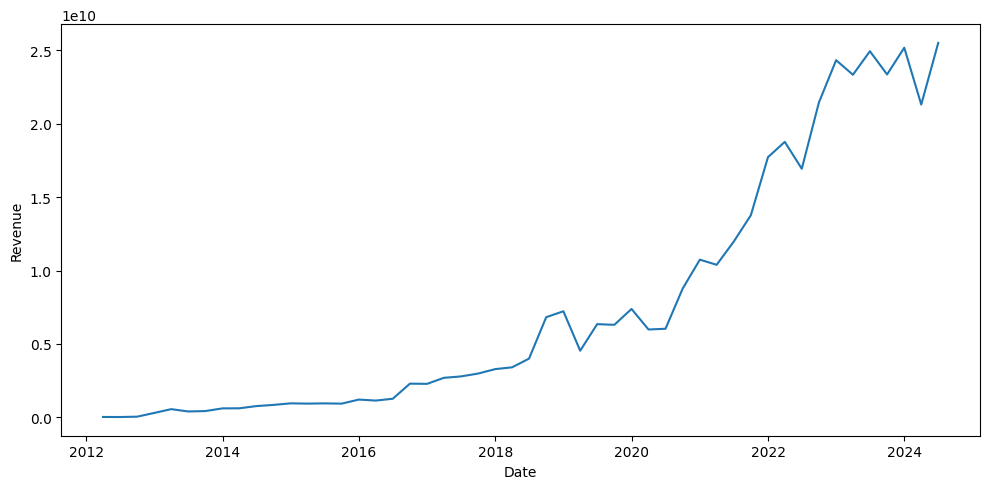

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5))

df_trimestral["Date"] = pd.to_datetime(df_trimestral["Date"])

sns.lineplot(data = df_trimestral, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

In [114]:
# Agrupamos por año para hacer histograma
df_trimestral['Year'] = df_trimestral['Date'].dt.year
revenue_por_año = df_trimestral.groupby('Year')['Revenue'].sum().reset_index()
print(revenue_por_año)

    Year       Revenue
0   2012  4.132500e+08
1   2013  2.013500e+09
2   2014  3.198350e+09
3   2015  4.045650e+09
4   2016  7.000000e+09
5   2017  1.175900e+10
6   2018  2.146100e+10
7   2019  2.457800e+10
8   2020  3.153200e+10
9   2021  5.383000e+10
10  2022  8.146000e+10
11  2023  9.678000e+10
12  2024  4.680000e+10


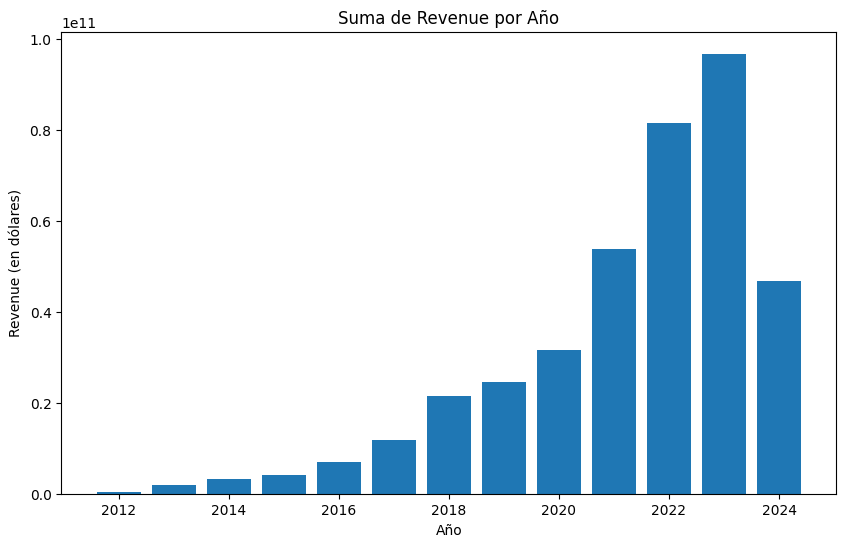

In [115]:
plt.figure(figsize=(10, 6))
plt.bar(revenue_por_año['Year'], revenue_por_año['Revenue'])

# Añadir títulos y etiquetas
plt.title('Revenue per year')
plt.xlabel('Year')
plt.ylabel('Revenue')

# Mostrar el gráfico
plt.show()

In [116]:
# Agrupo por trimestre de cada año para hacer histogramas de cada año
df_trimestral['Month'] = df_trimestral['Date'].dt.month

# Agrupar por año y mes, y sumar los ingresos
revenue_por_mes_año = df_trimestral.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()


print(revenue_por_mes_año)

    Year  Month       Revenue
0   2012      3  3.017000e+07
1   2012      6  2.665000e+07
2   2012      9  5.010000e+07
3   2012     12  3.063300e+08
4   2013      3  5.617900e+08
5   2013      6  4.051400e+08
6   2013      9  4.313500e+08
7   2013     12  6.152200e+08
8   2014      3  6.205400e+08
9   2014      6  7.693500e+08
10  2014      9  8.518000e+08
11  2014     12  9.566600e+08
12  2015      3  9.398800e+08
13  2015      6  9.549800e+08
14  2015      9  9.367900e+08
15  2015     12  1.214000e+09
16  2016      3  1.147000e+09
17  2016      6  1.270000e+09
18  2016      9  2.298000e+09
19  2016     12  2.285000e+09
20  2017      3  2.696000e+09
21  2017      6  2.790000e+09
22  2017      9  2.985000e+09
23  2017     12  3.288000e+09
24  2018      3  3.409000e+09
25  2018      6  4.002000e+09
26  2018      9  6.824000e+09
27  2018     12  7.226000e+09
28  2019      3  4.541000e+09
29  2019      6  6.350000e+09
30  2019      9  6.303000e+09
31  2019     12  7.384000e+09
32  2020  

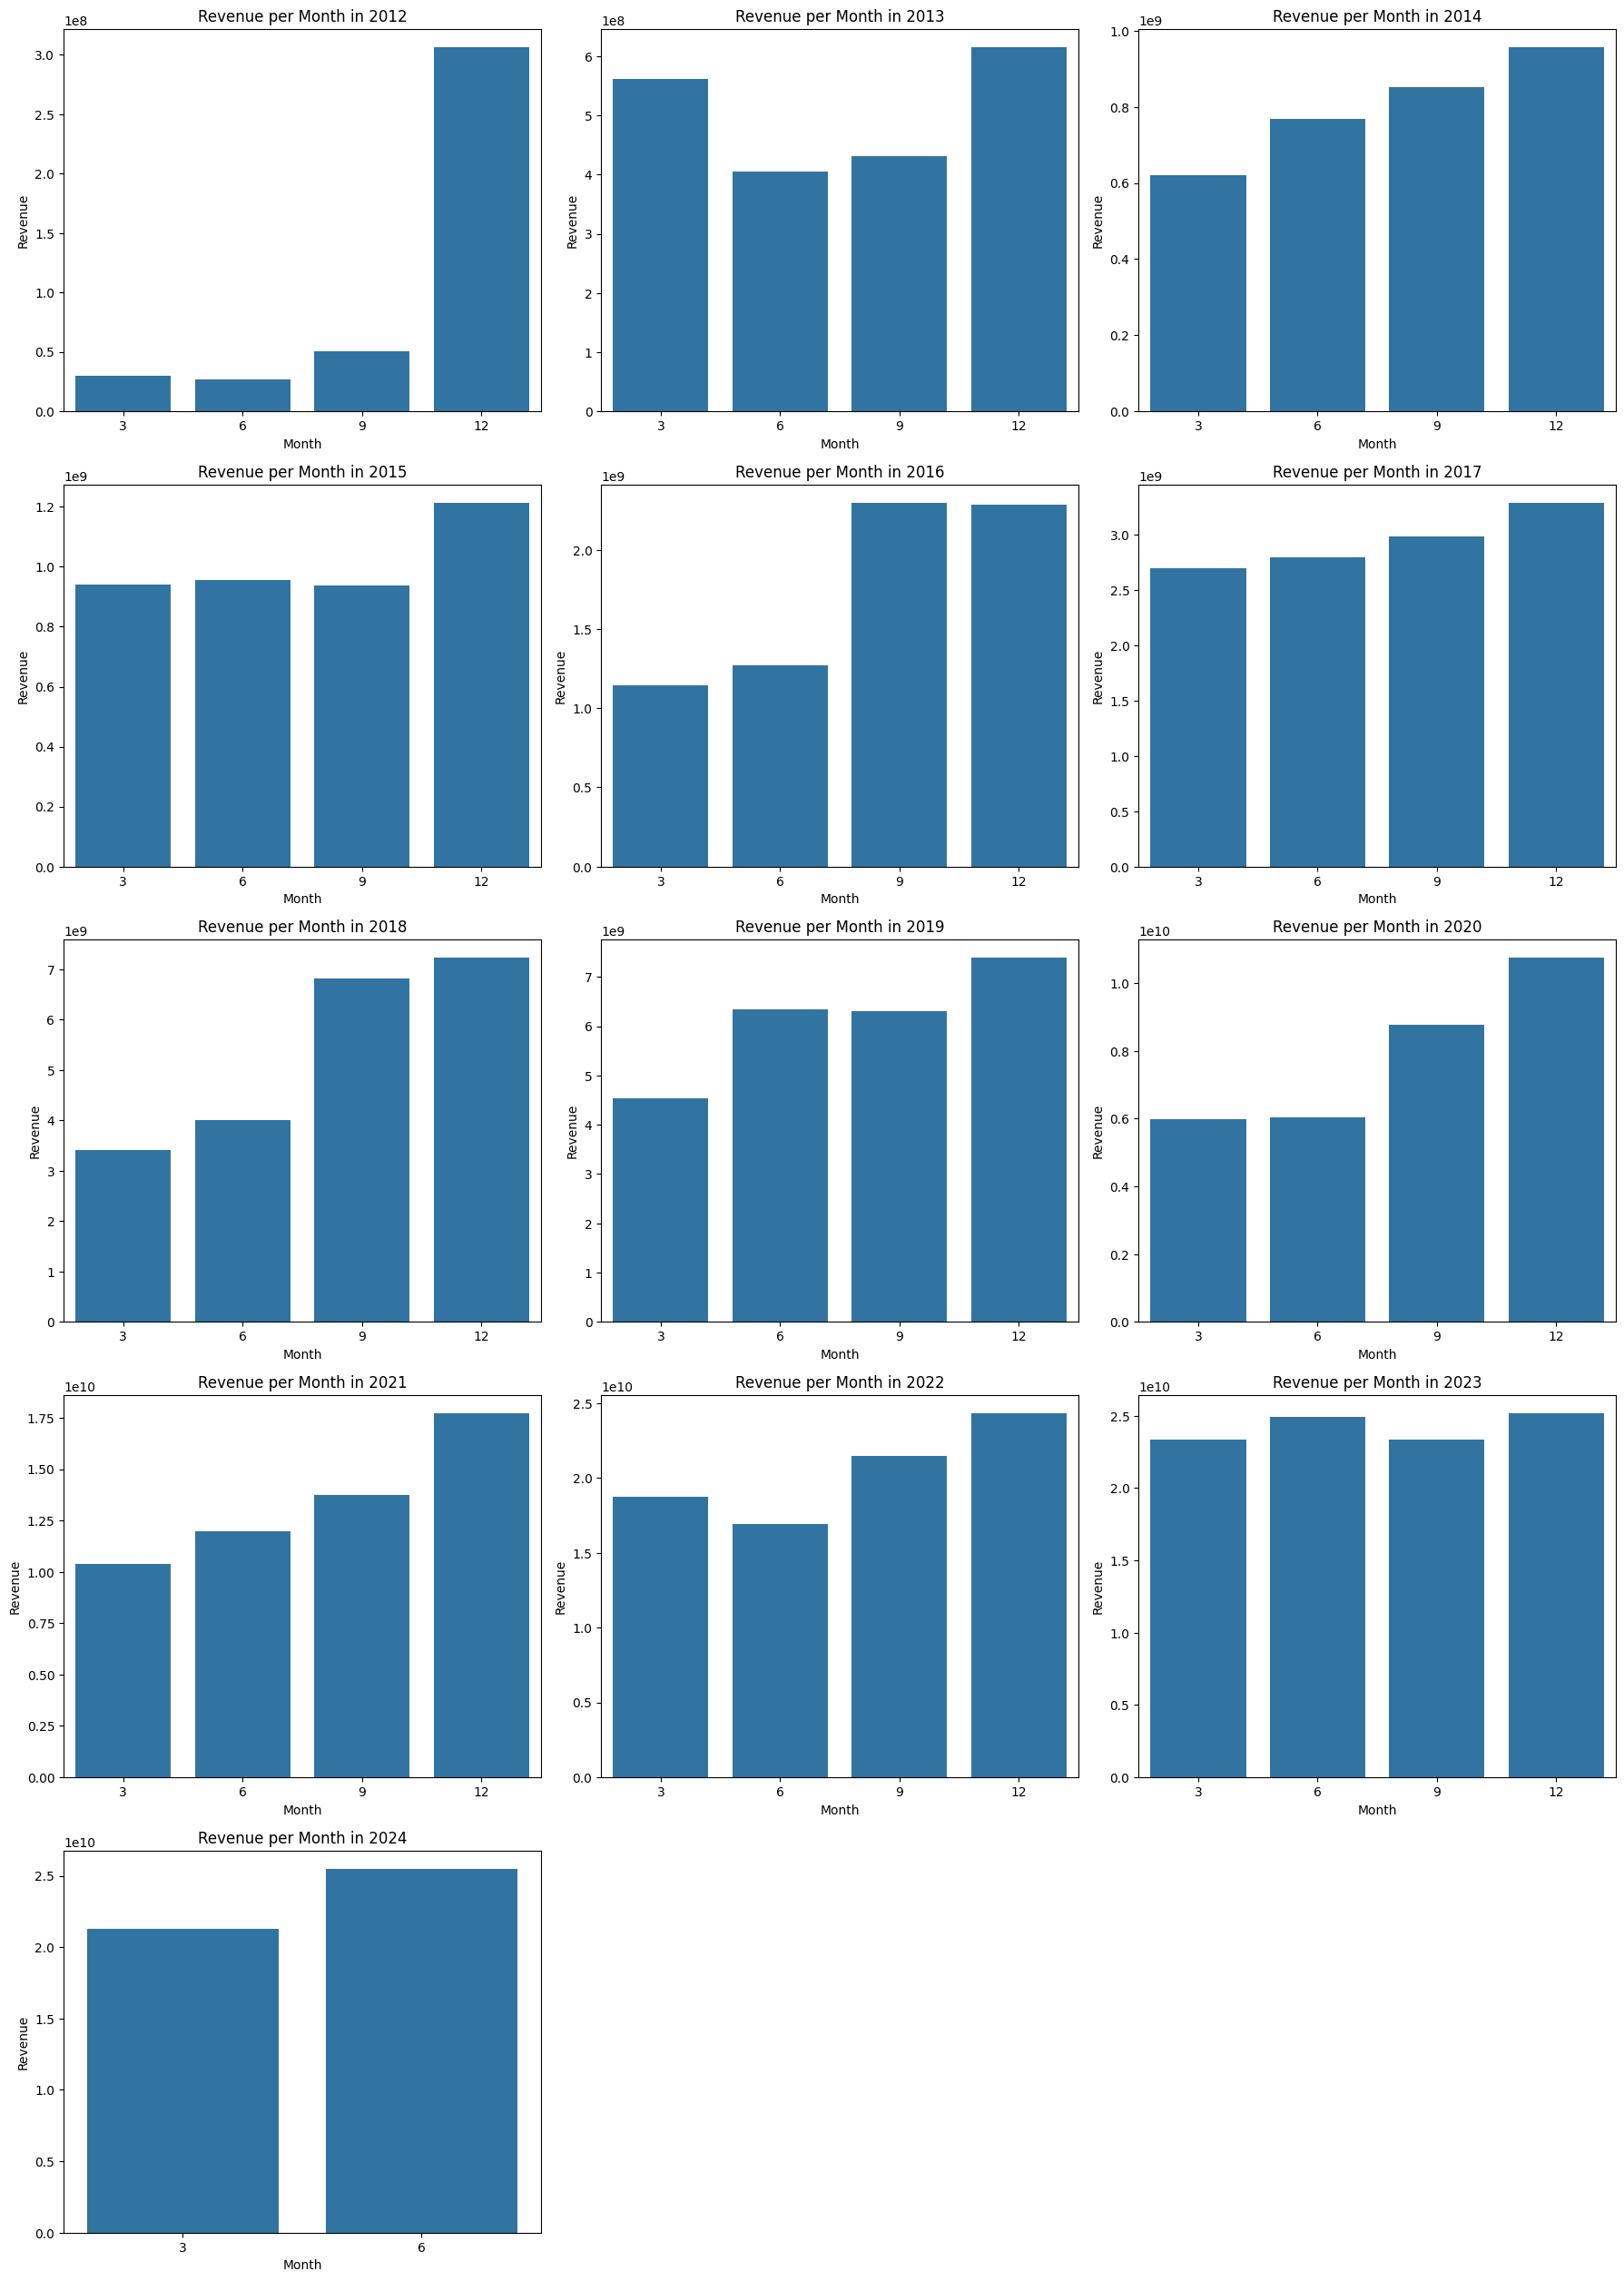

In [123]:
años = revenue_por_mes_año['Year'].unique() # Lista de los años disponibles

n_rows = 17 

plt.figure(figsize=(18, 85))


for i, año in enumerate(años): # Itero sobre cada año y con i voy pasando por cada cuadrícula
    
    datos_año = revenue_por_mes_año[revenue_por_mes_año['Year'] == año]
    
    
    plt.subplot(n_rows, 3, i + 1)  # n_rows x 3 cuadrícula, con el subplot en la posición (i + 1)
    

    sns.barplot(x='Month', y='Revenue', data=datos_año)
    
    
    plt.title(f'Revenue per Month in {año}')
    plt.xlabel('Month')
    plt.ylabel('Revenue')


plt.tight_layout()

plt.show()